In [1]:
%load_ext autoreload
%autoreload 2

## Produce equivalent figures to [Frolicher et al. (2020)](https://bg.copernicus.org/articles/17/2061/2020/)

In [2]:
from information import *
from plotting import *
from variance import *
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl

### Global average PPP (Figure 2)

In [3]:
savedir = ppeDict['datasavedir']+'/processed/ppp_regionalmeans/'
frequency = 'monthly'
startmonth = 1
maskset = 'global'
filename = '.'.join(['*',frequency,str(startmonth).zfill(2),maskset,'nc'])

region = 'global'
ds = xr.open_mfdataset(savedir+filename).sel(region=region)

OSError: no files to open

In [64]:
variables = ['intpp','intpp','o2os','intpp']
colors = {'tos':'black','phos':'red','o2os':'blue','intpp':'green'}

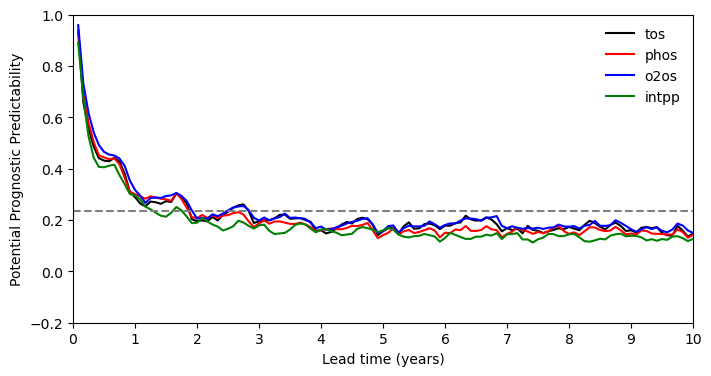

In [66]:
fig,ax,lines = draw_ppp_regionalmeans(ds[variables],colors=colors)
ax.set_xticks(np.arange(0,121,12))
ax.set_xticklabels(np.arange(0,11))
ax.set_xlabel('Lead time (years)')
ax.set_ylim([-0.2,1])
fig.set_size_inches(8,4)
save_fig(fig,
         'ppp_regionalmeans',
         '-'.join([*variables]),
         '-'.join(filename.split('.')[1:-1]),
         addnames=['froelicher'])

### Time horizon (Figure 3)

In [6]:
savedir = ppeDict['datasavedir']+'/processed/ppp_timehorizon/'
frequency = 'monthly'
smooth = 12
startmonth = 1
filename_cmp = ['*',frequency,str(startmonth).zfill(2)]
if smooth is not None:
    filename_cmp.append('smooth_'+str(smooth).zfill(2))
filename = '.'.join([*filename_cmp,'nc'])

ds = xr.open_mfdataset(savedir+filename)
grid = xr.open_dataset(ppeDict['griddirtmp']+ppeDict['gridfile'])

In [7]:
ds

<xarray.Dataset>
Dimensions:    (xh: 720, yh: 576)
Coordinates:
  * xh         (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh         (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
Data variables: (12/15)
    MLD_003    (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    chlos      (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    intpp      (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    intppdiat  (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    intppdiaz  (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    intppmisc  (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    ...         ...
    phos       (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    phycos     (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    po4os      (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    sos        (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    tos        (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>
    zoocos     (yh, xh) int64 dask.array<chunksize=(576, 720), meta=np.ndarray>

In [ ]:
variable = 'zoocos'
fig,ax,im,cbar = draw_globalmap(ds[variable],grid,cname='Predictability Time Horizon (Years)')
im.set_cmap(im.get_cmap().resampled(10))
cbar.set_ticks(np.arange(0,121,12))
cbar.set_ticklabels(np.arange(0,11))
save_fig(fig,
         'ppp_timehorizon',
         variable,
         '-'.join(filename.split('.')[1:-1]),
         addnames=['ecosystem'])